## Analisi descrittiva del dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy import stats

dataset = pd.read_csv('../data/datiLussazioniDefinitivi.csv', delimiter=';')
dataset

,CASE_ID,BREED,GENDER_01,AGEATSURGERYmo,BODYWEIGHTKG,Taglia,BCS,INDICATIONFORTHR,HIPRL,YEAR,...,NECKSIZE,HEADSIZE,ALO,CUPRETROVERSION,STEMANTEVERSIONREAL,RECTUSFEMORISM.RELEASE,first_lux_days_after_thr,DIRECTION,LUX_01,LUX_CR
0,1,3,0,"56,5","31,6",1,5,4,R,2021,...,4,1,46.0,15,"17,7",NO,NaN,NaN,0,0
1,2,8,0,"9,4","40,9",1,5,4,L,2021,...,5,1,40.0,25,"27,7",NO,NaN,NaN,0,0
2,3,10,0,"15,1333333333333",35,1,5,4,R,2021,...,4,1,42.0,20,"27,7",YES,NaN,NaN,0,0
3,4,6,0,"83,4333333333333","18,7",0,6,4,L,2021,...,4,0,40.0,18,"24,2",NO,NaN,NaN,0,0
4,5,5,0,"7,53333333333333","36,4",1,4,4,L,2021,...,5,1,42.0,28,"25,9",YES,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,3193,3,0,"57,4333333333333",25,1,5,2,R,2010,...,3,0,43.0,32,"27,7",NO,35.0,CRANIO-DORSALE,1,1
3193,3194,5,1,"49,2333333333333",38,1,6,2,R,2009,...,4,0,48.0,26,"25,9",NO,18.0,CRANIO-DORSALE,1,1
3194,3195,13,0,"38,0333333333333",43,1,5,2,R,2008,...,4,0,48.0,4,"11,5",NO,30.0,CRANIO-DORSALE,1,1
3195,3196,5,1,"11,5333333333333",28,1,5,2,R,2001,...,4,0,52.0,10,"31,3",NO,26.0,CRANIO-DORSALE,1,1


### Informazioni sul tipo di protesi utilizzate in relazione al peso dei cani

In [3]:
stemsizefreq = pd.crosstab(index = dataset.STEMSIZE, columns = ['Frequenze relative'], colnames = [''], normalize = True)
stemsizefreq.apply(lambda p: 100 * np.round(p,3))

,Frequenze relative
STEMSIZE,
LARGE,24.7
LARGE MINI,0.2
MEDIUM,43.4
SMALL,22.8
TIGER,0.4
X-LARGE,0.7
X-LARGE GIANT,1.1
X-LARGE MINI,0.7
X-SMALL,5.9


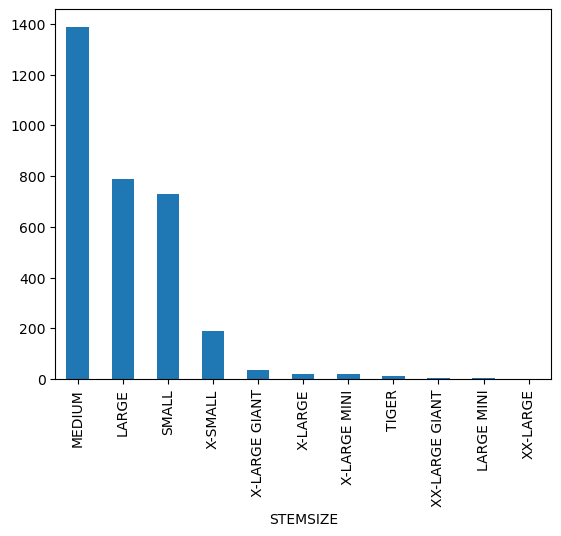

In [4]:
stemsize = dataset.STEMSIZE.value_counts()

stemsize.plot.bar()
plt.show()

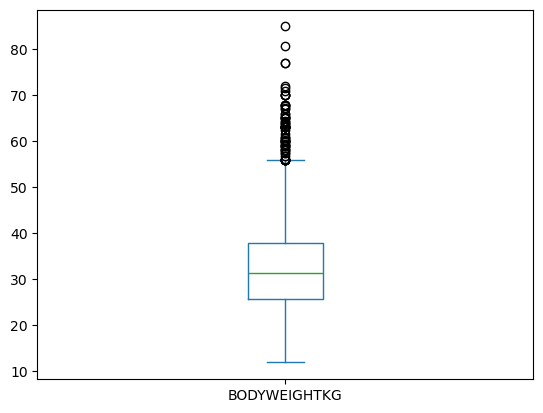

In [5]:
weight = dataset.BODYWEIGHTKG.str.replace(',', '.').astype('float64')
weight.plot.box()
plt.show()

Si conferma il fatto che la maggior parte dei cani presenti nel dataset sono di peso medio, e questo spiega perchè le tipologie di protesi utilizzate sono soprattutto medie.

### Relazione tra il peso dell'animale e la dimensione della protesi

#### Necksize

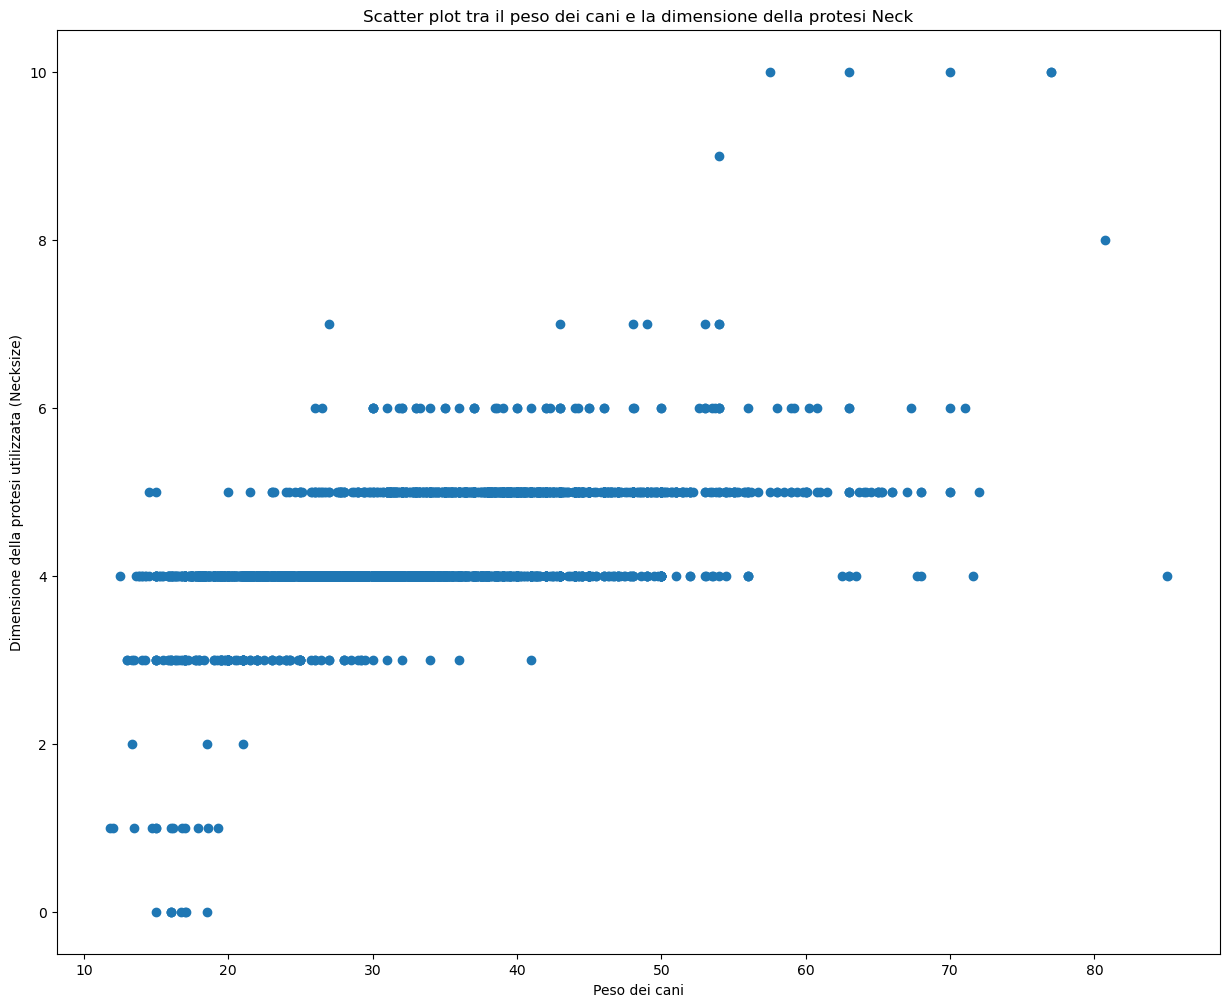

In [6]:
necksize = dataset.NECKSIZE

plt.figure(figsize=(15, 12))
plt.title("Scatter plot tra il peso dei cani e la dimensione della protesi Neck")
plt.scatter(weight, necksize)
plt.xlabel('Peso dei cani')
plt.ylabel('Dimensione della protesi utilizzata (Necksize)')
plt.show()

Maggiore è il peso dei cani e maggiori saranno le dimensioni della protesi.

Non abbiamo cani con un peso maggiore che hanno protesi piccole.

Non abbiamo cani con un peso minore che hanno protesi grandi.

In [7]:
necksize.corr(weight)

0.5677294796100625

#### Cupsize

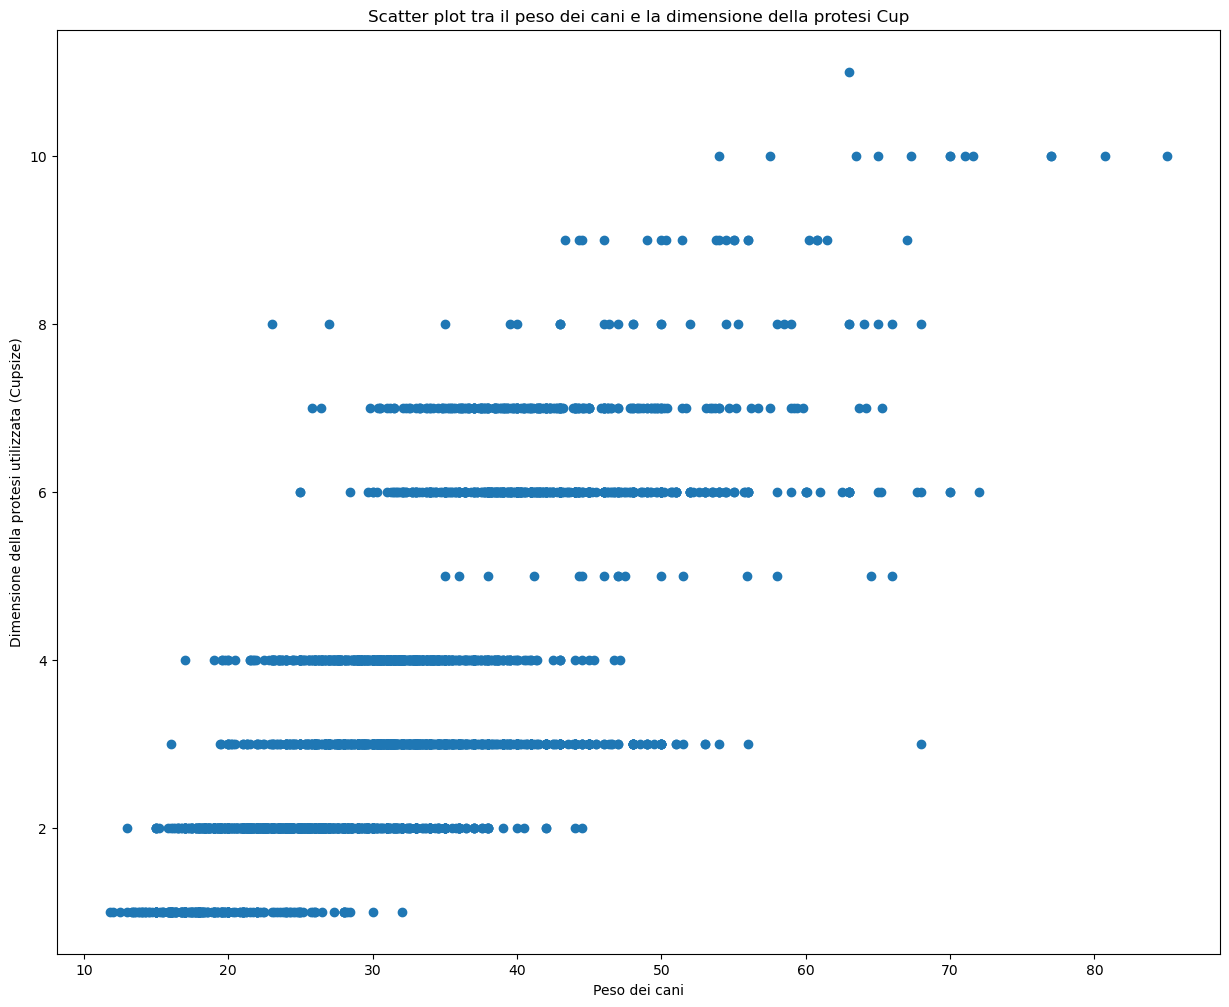

In [8]:
cupsize = dataset.CUPSIZE

plt.figure(figsize=(15, 12))
plt.title("Scatter plot tra il peso dei cani e la dimensione della protesi Cup")
plt.scatter(weight, cupsize)
plt.xlabel('Peso dei cani')
plt.ylabel('Dimensione della protesi utilizzata (Cupsize)')
plt.show()

In [9]:
cupsize.corr(weight)

0.7295680163241569

#### Headsize

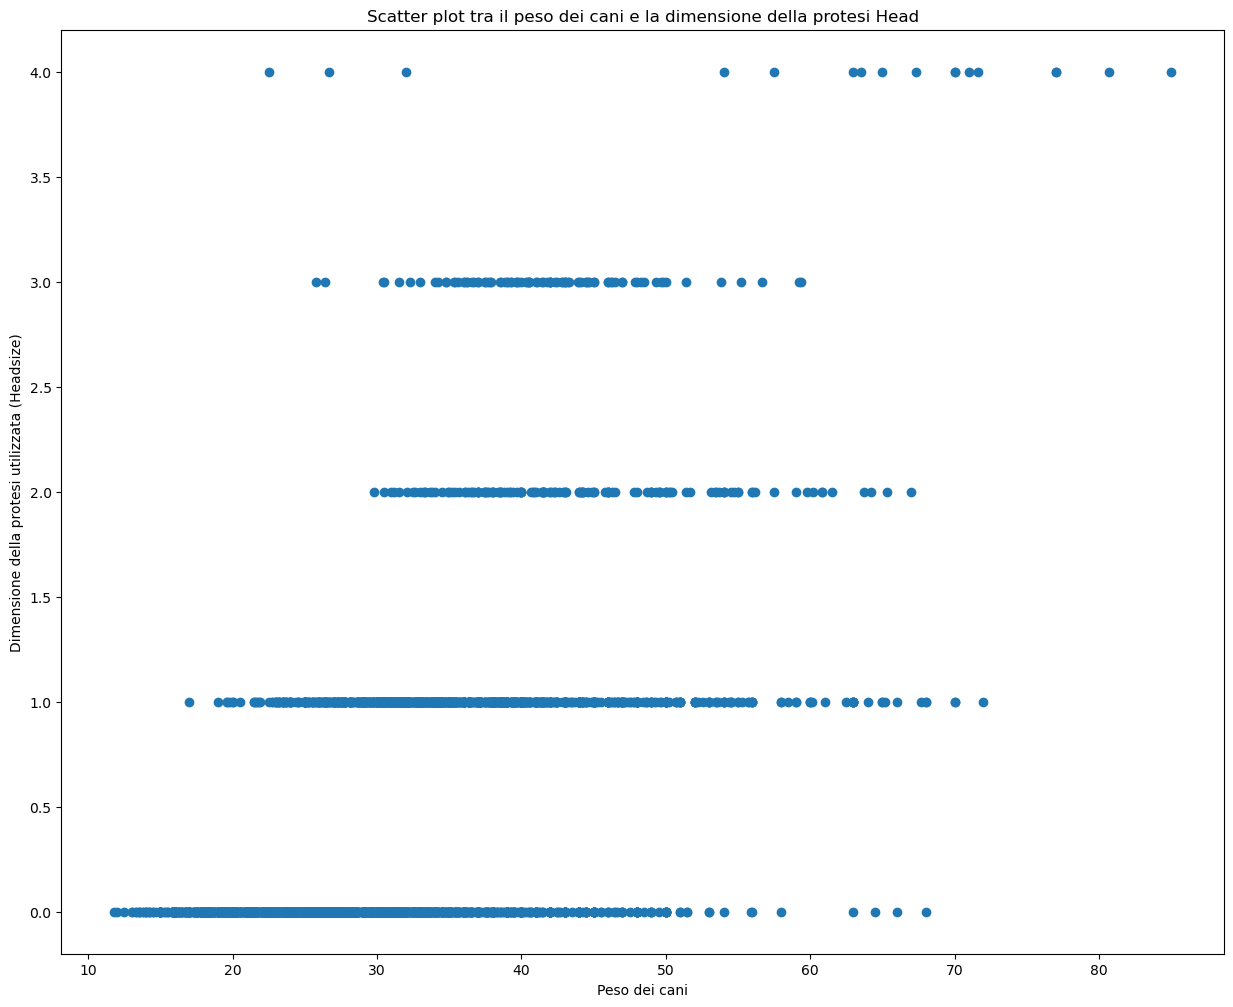

In [10]:
headsize = dataset.HEADSIZE

plt.figure(figsize=(15, 12))
plt.title("Scatter plot tra il peso dei cani e la dimensione della protesi Head")
plt.scatter(weight, headsize)
plt.xlabel('Peso dei cani')
plt.ylabel('Dimensione della protesi utilizzata (Headsize)')
plt.show()

In questo caso abbiamo una correlazione più debole tra i due, come indicato anche dall'indice di correlazione.

In [11]:
headsize.corr(weight)

0.5081160683792697

### Relazione tra il peso dei cani e la posizione della protesi utilizzata

#### Cupretroversion

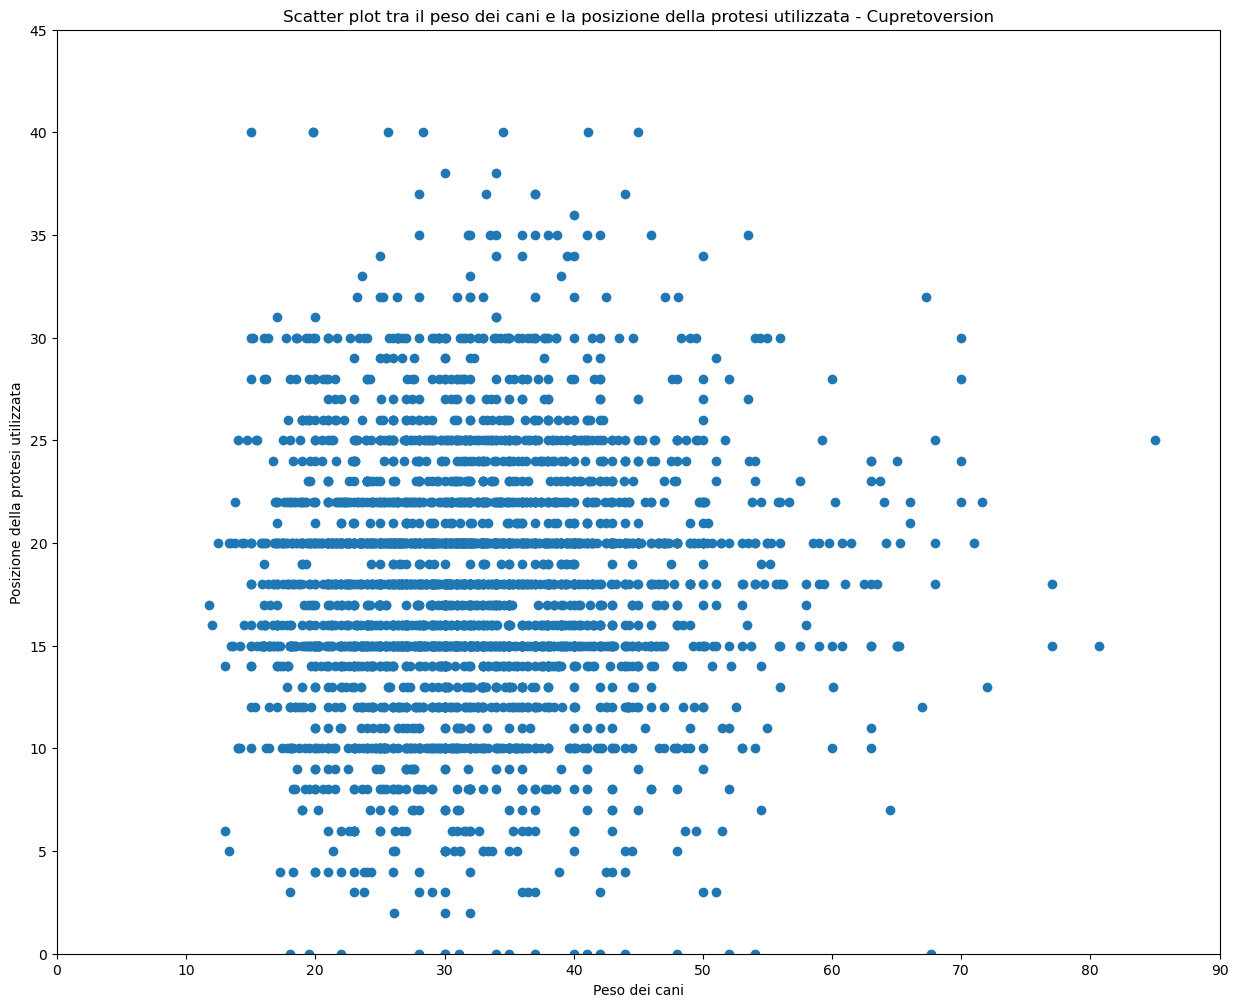

In [12]:
cupretroversion = dataset.CUPRETROVERSION.astype('int')

plt.figure(figsize=(15, 12))
plt.title("Scatter plot tra il peso dei cani e la posizione della protesi utilizzata - Cupretoversion")
plt.scatter(weight, cupretroversion)
plt.xlabel('Peso dei cani')
plt.ylabel('Posizione della protesi utilizzata')

plt.xlim(0, 90)
plt.ylim(0, 45)
plt.show()

In [13]:
weight.corr(cupretroversion)

0.051869581274115915

Non c'è alcun tipo di correlazione.

#### ALO

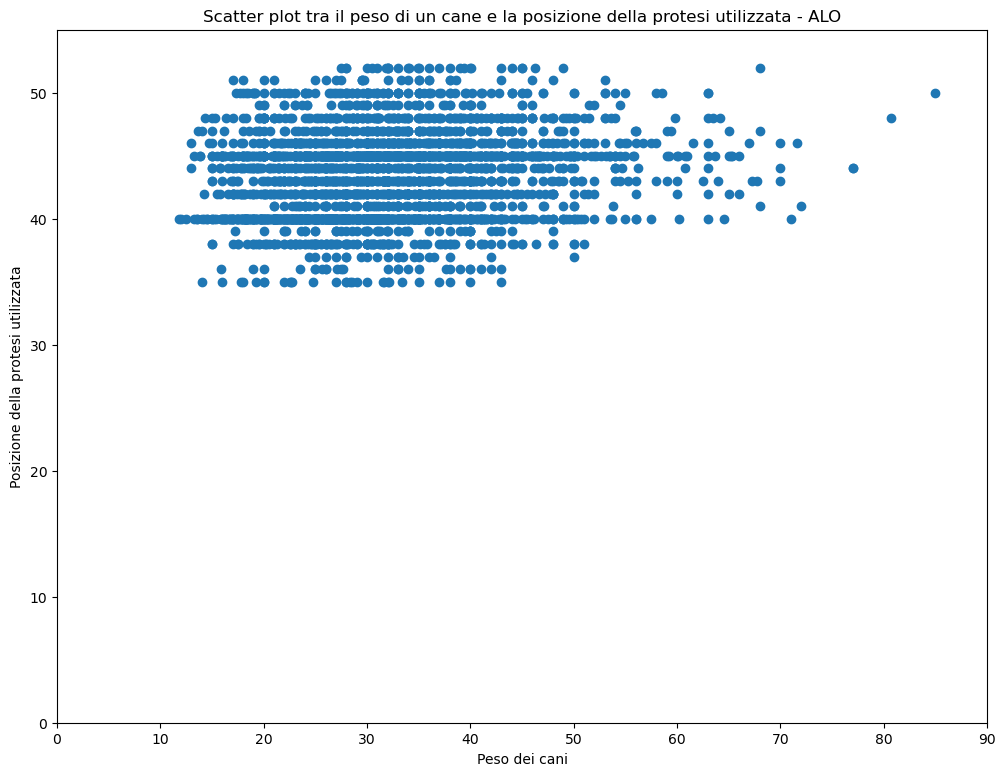

In [14]:
db = dataset[dataset['ALO'] != ' ']
db = db[db['ALO'].notna()]
peso = db.BODYWEIGHTKG.str.replace(',', '.').astype('float64')

alo = db.ALO

plt.figure(figsize=(12, 9))
plt.title("Scatter plot tra il peso di un cane e la posizione della protesi utilizzata - ALO")
plt.scatter(peso, alo)
plt.xlabel('Peso dei cani')
plt.ylabel('Posizione della protesi utilizzata')

plt.xlim(0, 90)
plt.ylim(0, 55)

plt.show()

In [15]:
peso.corr(alo)

0.171651486504609

Anche in questo caso non c'è alcun tipo di correlazione

#### STEMANTEVERSIONREAL

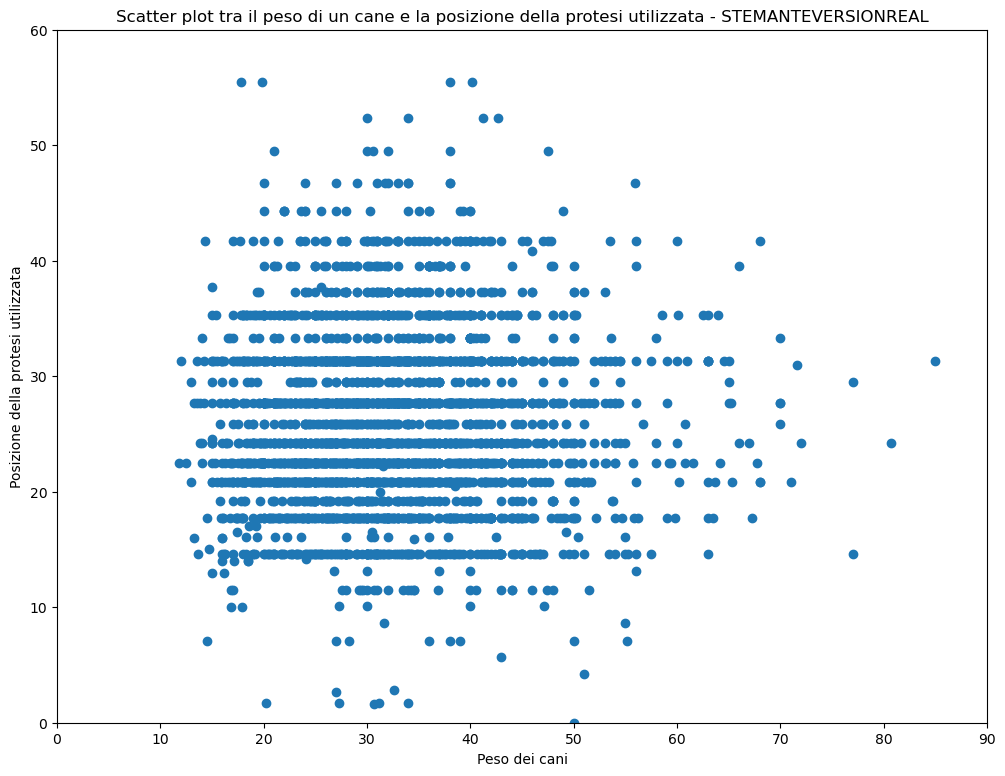

In [16]:
db = dataset[dataset['STEMANTEVERSIONREAL'] != ' ']

peso = db.BODYWEIGHTKG.str.replace(',', '.').astype('float64')
stemante = db.STEMANTEVERSIONREAL.str.replace(',', '.').astype('float64')

plt.figure(figsize=(12, 9))
plt.title("Scatter plot tra il peso di un cane e la posizione della protesi utilizzata - STEMANTEVERSIONREAL")
plt.scatter(peso, stemante)
plt.xlabel('Peso dei cani')
plt.ylabel('Posizione della protesi utilizzata')

plt.xlim(0, 90)
plt.ylim(0, 60)

plt.show()

In [17]:
peso.corr(stemante)

0.023037188154162103

Non c'è alcun tipo di correlazione.

### Relazione maschi e femmine

In [18]:
maschi = dataset[dataset.GENDER_01 == 0]
femmine = dataset[dataset.GENDER_01 == 1]

# 0 rappresenta i maschi
# 1 rappresenta le femmine

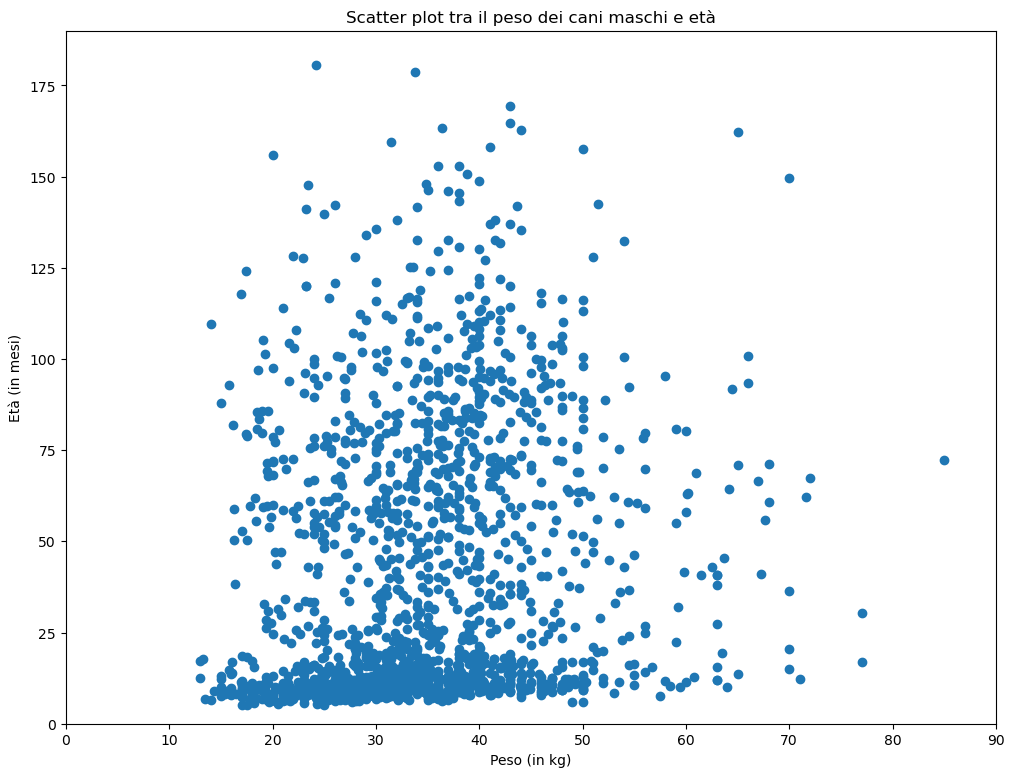

In [19]:
pesoMaschi = maschi.BODYWEIGHTKG.str.replace(',', '.').astype('float64')
etaMaschi = maschi.AGEATSURGERYmo.str.replace(',', '.').astype('float64')

plt.figure(figsize=(12, 9))
plt.title('Scatter plot tra il peso dei cani maschi e età')
plt.scatter(pesoMaschi, etaMaschi)
plt.xlim(0, 90)
plt.ylim(0, 190)

plt.xlabel('Peso (in kg)')
plt.ylabel('Età (in mesi)')
plt.show()

In [20]:
print("Moda:", statistics.mode(pesoMaschi))
print("Mediana:", pesoMaschi.median())
print("Media:", pesoMaschi.mean())

Moda: 35.0
Mediana: 33.4
Media: 34.410611205432936


In [21]:
print("Moda:", statistics.mode(etaMaschi))
print("Mediana:", etaMaschi.median())
print("Media:", etaMaschi.mean())

Moda: 9.16666666666667
Mediana: 19.2
Media: 39.701286549707596


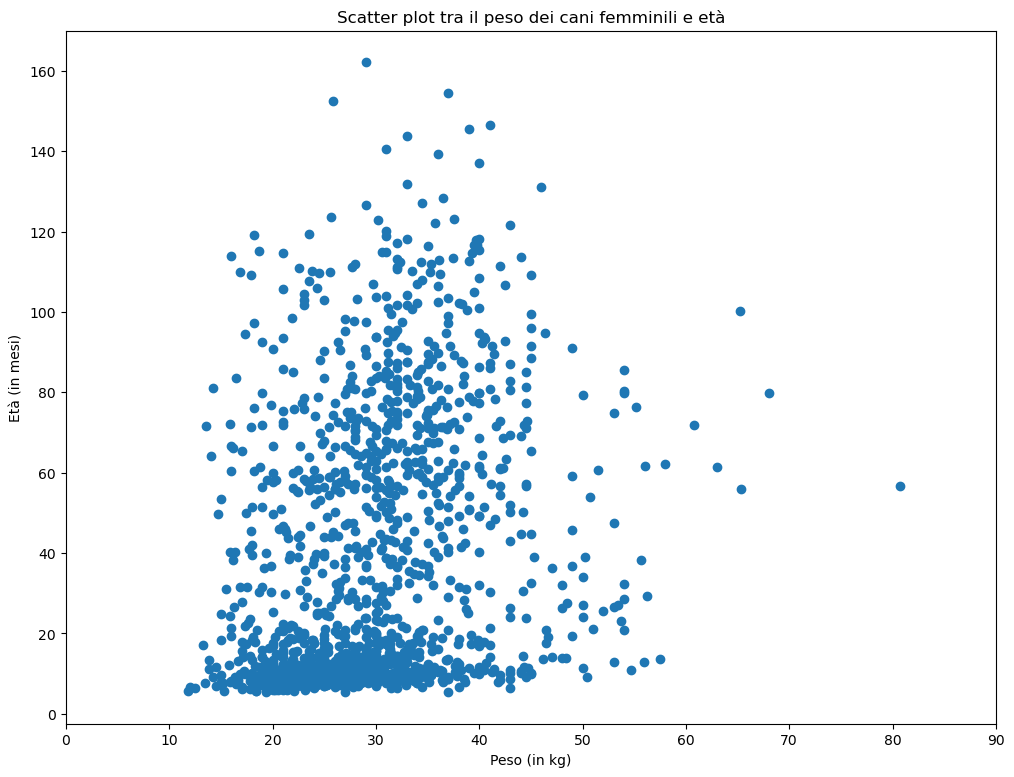

In [22]:
pesoFemmine = femmine.BODYWEIGHTKG.str.replace(',', '.').astype('float64')
etaFemmine = femmine.AGEATSURGERYmo.str.replace(',', '.').astype('float64')

plt.figure(figsize=(12, 9))
plt.title('Scatter plot tra il peso dei cani femminili e età')
plt.scatter(pesoFemmine, etaFemmine)
plt.xlim(0, 90)

plt.xlabel('Peso (in kg)')
plt.ylabel('Età (in mesi)')
plt.show()

Nel dataset ci sono, per quanto riguarda le femmine, soprattutto cani giovani con un peso inferiore rispetto ai maschi. Infatti i pesi si concentrano soprattutto tra i 10 e i 45, con la presenza di qualche outlier.

In [23]:
print("Moda:", statistics.mode(pesoFemmine))
print("Mediana:", pesoFemmine.median())
print("Media:", pesoFemmine.mean())

Moda: 30.0
Mediana: 29.0
Media: 29.658881118881116


In [24]:
print("Moda:", statistics.mode(etaFemmine))
print("Mediana:", etaFemmine.median())
print("Media:", etaFemmine.mean())

Moda: 7.63333333333333
Mediana: 20.116666666666653
Media: 37.711128205128205


Il peso medio dei cani maschi è molto superiore rispetto al peso medio dei cani femmina.

Le età medie sono differenti ma di poco, i valori sono più simili rispetto al peso.

#### Stemsize tra maschi e femmine

In [25]:
int_gender = pd.crosstab(index = dataset.STEMSIZE, columns = dataset.GENDER_01)
int_gender

GENDER_01,0,1
STEMSIZE,,
LARGE,537,252
LARGE MINI,3,2
MEDIUM,710,678
SMALL,352,376
TIGER,10,4
X-LARGE,17,5
X-LARGE GIANT,30,4
X-LARGE MINI,9,12
X-SMALL,94,95


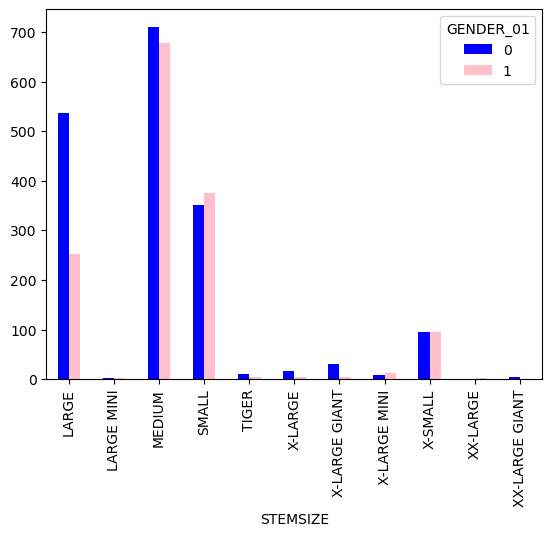

In [26]:
int_gender.plot.bar(color = ['blue', 'pink'])
plt.show()

Il tipo di protesi utilizzata sui soggetti:
+ per le femmine la maggior parte delle protesi utilizzate sono medium e small
+ per i maschi la maggior parte delle protesi utilizzate sono large e medium

Quindi le due distribuzioni sembrano essere diverse, ora eseguo il test di Kolmogorov-Smirnov per valutare se i due campioni seguono la stessa distribuzione. Dal grafico non sembrano seguire la stessa distribuzione.


In [27]:
ks_statistic, p_value = stats.ks_2samp(maschi.STEMSIZE, femmine.STEMSIZE)
if p_value < 0.05:
    print("Le distribuzioni sono diverse.")
else:
    print("Le distribuzioni sono simili.")

Le distribuzioni sono diverse.


In [28]:
int_gender_all = pd.crosstab(index = dataset.STEMSIZE, columns = dataset.GENDER_01, margins = True, normalize = True)
int_gender_all.apply(lambda p: 100 * np.round(p,3))

GENDER_01,0,1,All
STEMSIZE,,,
LARGE,16.8,7.9,24.7
LARGE MINI,0.1,0.1,0.2
MEDIUM,22.2,21.2,43.4
SMALL,11.0,11.8,22.8
TIGER,0.3,0.1,0.4
X-LARGE,0.5,0.2,0.7
X-LARGE GIANT,0.9,0.1,1.1
X-LARGE MINI,0.3,0.4,0.7
X-SMALL,2.9,3.0,5.9


### Relazione maschi-femmine tra il peso in kg e le dimensioni della protesi

#### Cupsize

In [29]:
# Maschi

maschi.CUPSIZE.value_counts()

CUPSIZE
3     495
2     413
6     290
4     282
7     144
1      86
9      18
8      18
5      11
10     10
Name: count, dtype: int64

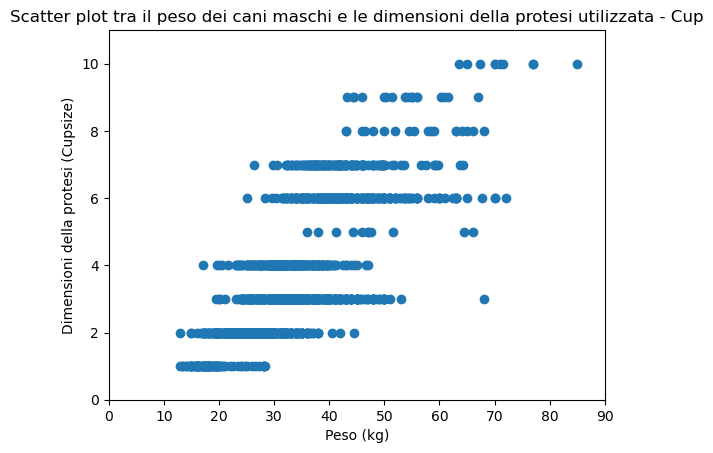

In [30]:
plt.scatter(pesoMaschi, maschi.CUPSIZE)

plt.title("Scatter plot tra il peso dei cani maschi e le dimensioni della protesi utilizzata - Cup")

plt.xlim(0, 90)
plt.xlabel("Peso (kg)")
plt.ylim(0, 11)
plt.ylabel("Dimensioni della protesi (Cupsize)")

plt.show()

In [31]:
pesoMaschi.corr(maschi.CUPSIZE)

0.7307884842674932

In [32]:
# Femmine

femmine.CUPSIZE.value_counts()

CUPSIZE
2     480
3     401
4     249
1     115
6     101
7      64
8       9
5       5
10      3
9       2
11      1
Name: count, dtype: int64

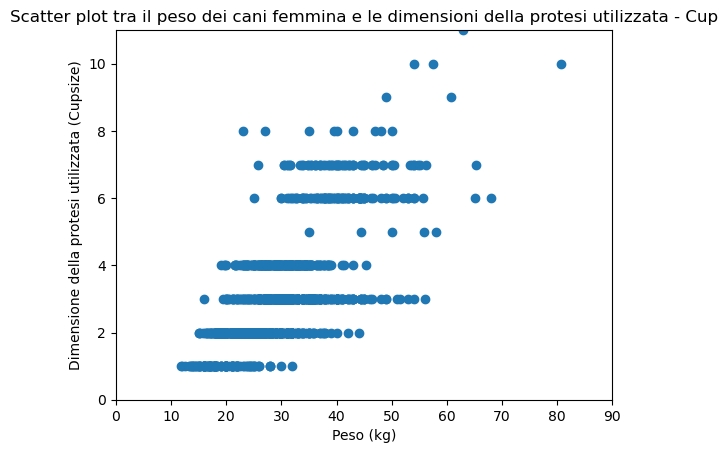

In [33]:
plt.scatter(pesoFemmine, femmine.CUPSIZE)

plt.title("Scatter plot tra il peso dei cani femmina e le dimensioni della protesi utilizzata - Cup")

plt.xlim(0, 90)
plt.xlabel("Peso (kg)")
plt.ylim(0, 11)
plt.ylabel("Dimensione della protesi utilizzata (Cupsize)")

plt.show()

In [34]:
pesoFemmine.corr(femmine.CUPSIZE)

0.6952088922610019

Per quanto riguarda la protesi CUP, le dimensioni utilizzate sono abbastanze omogenee e in particolare le più utilizzate sono quelle tra il 2 e il 6. Inoltre sia per i maschi che per le femmine abbiamo una correlazione tra la dimensione della protesi utilizzata e il peso. Quindi più aumenta il peso più aumenta la dimensione della protesi CUP.

#### Necksize

In [35]:
# Maschi

maschi.NECKSIZE.value_counts()

NECKSIZE
4     1166
5      485
3       54
6       46
1        5
0        4
7        3
10       3
2        1
Name: count, dtype: int64

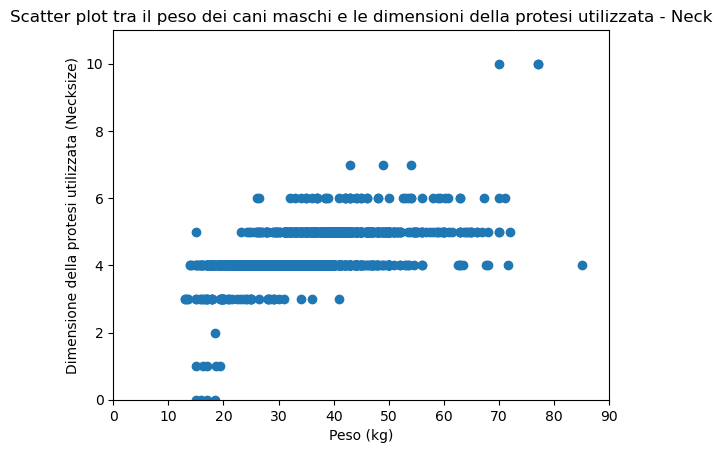

In [36]:
plt.scatter(pesoMaschi, maschi.NECKSIZE)

plt.title("Scatter plot tra il peso dei cani maschi e le dimensioni della protesi utilizzata - Neck")

plt.xlim(0, 90)
plt.xlabel("Peso (kg)")
plt.ylim(0, 11)
plt.ylabel("Dimensione della protesi utilizzata (Necksize)")

plt.show()

In [37]:
pesoMaschi.corr(maschi.NECKSIZE)

0.5671448873595181

In [38]:
#Femmine

femmine.NECKSIZE.value_counts()

NECKSIZE
4     1109
5      220
3       64
6       15
1        8
7        4
0        4
10       2
2        2
9        1
8        1
Name: count, dtype: int64

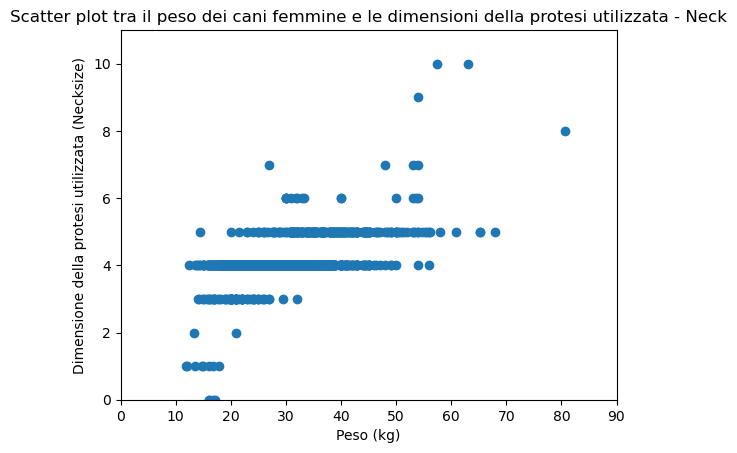

In [39]:
plt.scatter(pesoFemmine, femmine.NECKSIZE)

plt.title("Scatter plot tra il peso dei cani femmine e le dimensioni della protesi utilizzata - Neck")

plt.xlim(0, 90)
plt.xlabel("Peso (kg)")
plt.ylim(0, 11)
plt.ylabel("Dimensione della protesi utilizzata (Necksize)")

plt.show()

In [40]:
pesoFemmine.corr(femmine.NECKSIZE)

0.5485028003514336

Per quanto riguarda la protesi Neck, le dimensioni utilizzate sono quelle tra la 4 e la 5. Esiste una correlazione non forte come nell'altro caso tra il peso dell'animale e la dimensinoe della protesti utilizzata.

#### Headsize

In [41]:
maschi.HEADSIZE.value_counts()

HEADSIZE
0    1008
1     586
2      98
3      64
4      11
Name: count, dtype: int64

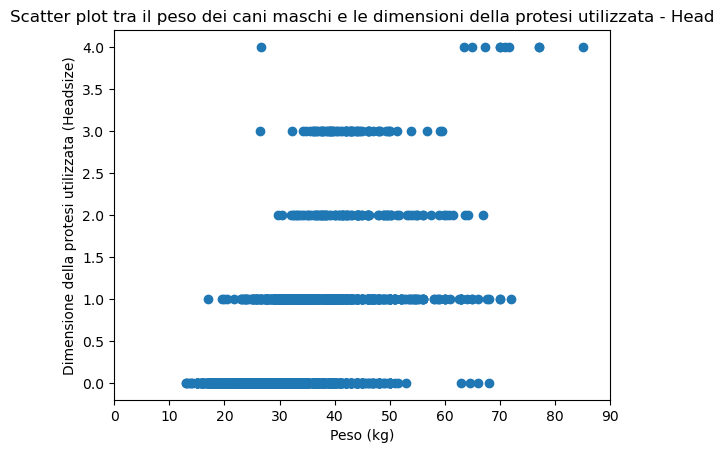

In [42]:
plt.scatter(pesoMaschi, maschi.HEADSIZE)

plt.title("Scatter plot tra il peso dei cani maschi e le dimensioni della protesi utilizzata - Head")

plt.xlim(0, 90)
plt.xlabel("Peso (kg)")
plt.ylabel("Dimensione della protesi utilizzata (Headsize)")

plt.show()

In [43]:
pesoMaschi.corr(maschi.HEADSIZE)

0.5078365346054214

In [44]:
# femmine

femmine.HEADSIZE.value_counts()

HEADSIZE
0    1003
1     355
2      39
3      27
4       6
Name: count, dtype: int64

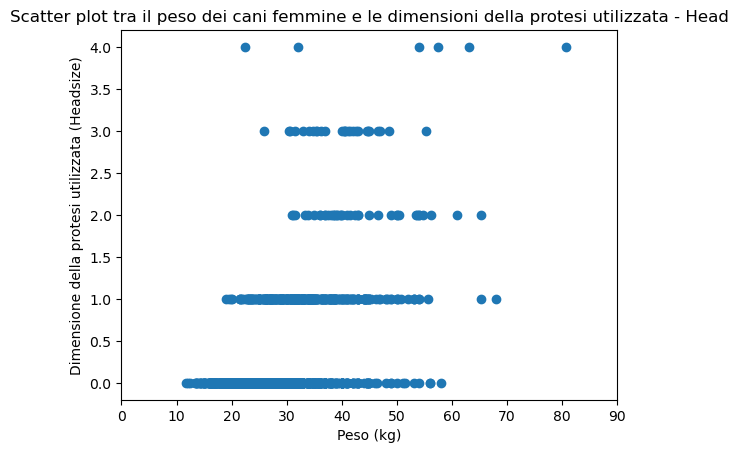

In [45]:
plt.scatter(pesoFemmine, femmine.HEADSIZE)

plt.title("Scatter plot tra il peso dei cani femmine e le dimensioni della protesi utilizzata - Head")

plt.xlim(0, 90)
plt.xlabel("Peso (kg)")
plt.ylabel("Dimensione della protesi utilizzata (Headsize)")

plt.show()

In [46]:
pesoFemmine.corr(femmine.HEADSIZE)

0.47249246000649997

Per quanto riguarda le protesi head, la dimensione più utilizzata per entrambi i sessi è 0. Anche in questo caso abbiamo una correlazione ancora peggiore tra il peso e la dimensione.

### Considerazioni sull'attributo LUX_CR

L'attributo indica quando un'operazione è considerata:
+ challenging $\rightarrow$ 1
+ regular $\rightarrow$ 0

In [47]:
regular = dataset[dataset['LUX_CR'] == 0]
chall = dataset[dataset['LUX_CR'] == 1]

In [48]:
regular.AGEATSURGERYmo.str.replace(',', '.').astype('float64').mean()

43.78457826598665

In [49]:
chall.AGEATSURGERYmo.str.replace(',', '.').astype('float64').mean()

19.2472170781893

Dato interessante, l'età media dei casi considerati challenging è nettamente inferiore all'età media dei casi considerati regular, probabilmente dati dal fatto che l'operazione per un cane più giovane risulta più difficile.
Sono più a rischio i cani giovani.

In [50]:
regular.BODYWEIGHTKG.str.replace(',', '.').astype('float64').mean()

32.882659866614354

In [51]:
chall.BODYWEIGHTKG.str.replace(',', '.').astype('float64').mean()

29.93495370370371

La media del peso delle due classi è comunque diversa ma una differenza minore.

### Taglia

In [52]:
dataset.Taglia.value_counts().sort_index()

Taglia
0     288
1    2909
Name: count, dtype: int64

In [53]:
pd.crosstab(index = dataset.Taglia, columns = ['Frequenze casi'], colnames = [''], normalize = True).apply(lambda p: 100 * np.round(p, 3))

,Frequenze casi
Taglia,
0,9.0
1,91.0


Notiamo che nel dataset la maggior parte dei cani presenti sono di taglia grande.

In [54]:
pd.crosstab(index = regular.Taglia, columns = ['Frequenze casi "Regular"'], colnames = [''], normalize = True).apply(lambda p: 100 * np.round(p, 3))

# taglia 0 -> taglia piccola
# taglia 1 -> taglia grande

,"Frequenze casi ""Regular"""
Taglia,
0,7.3
1,92.7


Nei casi regular abbiamo soprattutto cani di grossa taglia, con le percentuali qui segnate.

In [55]:
pd.crosstab(index = chall.Taglia, columns = ['Frequenze casi "Challenging"'], colnames = [''], normalize = True).apply(lambda p: 100 * np.round(p, 3))

,"Frequenze casi ""Challenging"""
Taglia,
0,15.9
1,84.1


Nei casi challenging abbiamo sempre una predominanza di cani di grossa taglia ma in percentuali diverse rispetto a prima. Quindi abbiamo un numero maggiore di cani di taglia piccola che vengono considerati come casi "challenging".

Casi regular e relazione con la dimensione della protesi utilizzata, e stessa cosa per i casi challenging.

### Dimensione della protesi

#### Cupsize

In [56]:
pd.crosstab(index = regular.CUPSIZE, columns = dataset.LUX_CR, normalize = True).apply(lambda p: 100 * np.round(p, 3))

LUX_CR,0
CUPSIZE,
1,4.7
2,28.5
3,31.1
4,15.0
5,0.5
6,13.3
7,5.1
8,0.9
9,0.6


In [57]:
regular.CUPSIZE.mean()

3.481757551981169

In [58]:
pd.crosstab(index = chall.CUPSIZE, columns = dataset.LUX_CR, normalize = True).apply(lambda p: 100 * np.round(p, 3))

LUX_CR,1
CUPSIZE,
1,12.3
2,25.8
3,15.7
4,23.0
5,0.5
6,8.0
7,12.2
8,0.8
9,0.6


In [59]:
chall.CUPSIZE.mean()

3.615740740740741

<Figure size 1000x600 with 0 Axes>

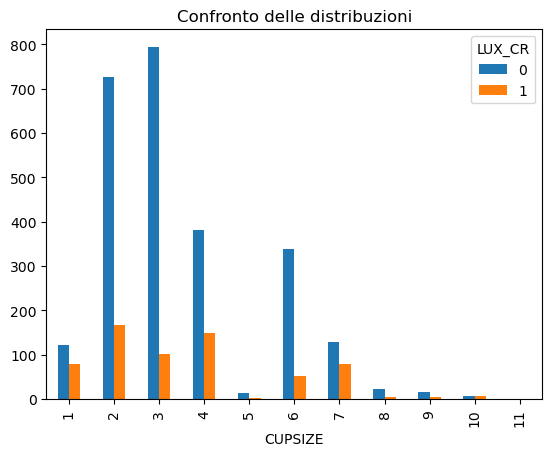

In [60]:
plt.figure(figsize=(10, 6))
pd.crosstab(index = dataset.CUPSIZE, columns = dataset.LUX_CR).plot.bar()
plt.title('Confronto delle distribuzioni')
plt.show()

In [61]:
ks_statistic, p_value = stats.ks_2samp(regular.CUPSIZE, chall.CUPSIZE)
if p_value < 0.05:
    print("Le distribuzioni sono diverse.")
else:
    print("Le distribuzioni sono simili.")

Le distribuzioni sono diverse.


#### Necksize

In [62]:
pd.crosstab(index = regular.NECKSIZE, columns = dataset.LUX_CR, normalize = True).apply(lambda p: 100 * np.round(p, 3))

LUX_CR,0
NECKSIZE,
0,0.2
1,0.3
2,0.1
3,3.2
4,70.7
5,23.1
6,2.0
7,0.3
9,0.0


In [63]:
regular.NECKSIZE.mean()

4.238132601020008

In [64]:
pd.crosstab(index = chall.NECKSIZE, columns = dataset.LUX_CR, normalize = True).apply(lambda p: 100 * np.round(p, 3))

LUX_CR,1
NECKSIZE,
0,0.6
1,0.8
2,0.2
3,5.7
4,73.0
5,17.7
6,1.4
8,0.2
10,0.5


In [65]:
chall.NECKSIZE.mean()

4.131172839506172

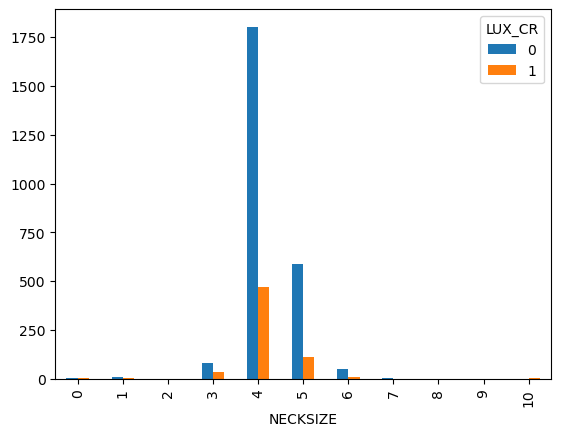

In [66]:
pd.crosstab(index = dataset.NECKSIZE, columns = dataset.LUX_CR).plot.bar()
plt.show()

In [67]:
ks_statistic, p_value = stats.ks_2samp(regular.NECKSIZE, chall.NECKSIZE)
if p_value < 0.05:
    print("Le distribuzioni sono diverse.")
else:
    print("Le distribuzioni sono simili.")

Le distribuzioni sono simili.


#### Headsize

In [68]:
pd.crosstab(index = regular.HEADSIZE, columns = dataset.LUX_CR, normalize = True).apply(lambda p: 100 * np.round(p, 3))

LUX_CR,0
HEADSIZE,
0,64.9
1,29.0
2,3.6
3,2.0
4,0.4


In [69]:
regular.HEADSIZE.mean()

0.43978030600235385

In [70]:
pd.crosstab(index = chall.HEADSIZE, columns = dataset.LUX_CR, normalize = True).apply(lambda p: 100 * np.round(p, 3))

LUX_CR,1
HEADSIZE,
0,54.9
1,31.2
2,6.8
3,6.0
4,1.1


In [71]:
chall.HEADSIZE.mean()

0.6712962962962963

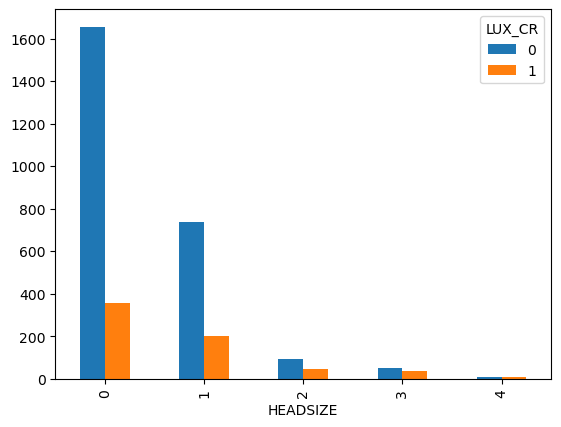

In [72]:


pd.crosstab(index = dataset.HEADSIZE, columns = dataset.LUX_CR).plot.bar()
plt.show()



In [73]:
ks_statistic, p_value = stats.ks_2samp(regular.NECKSIZE, chall.NECKSIZE)
if p_value < 0.05:
    print("Le distribuzioni sono diverse.")
else:
    print("Le distribuzioni sono simili.")

Le distribuzioni sono simili.


### Considerazioni sugli anni

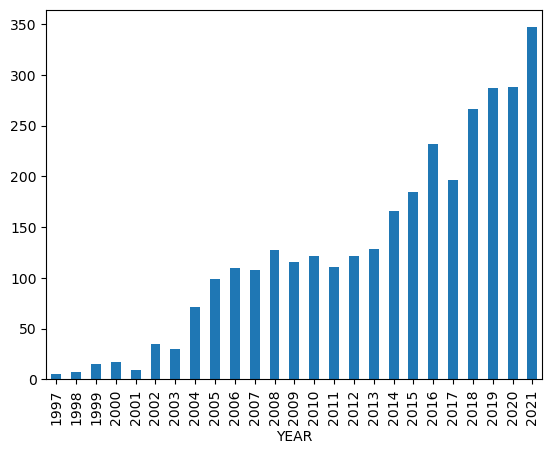

In [74]:
year = dataset.YEAR.value_counts().sort_index()
year

year.plot.bar()
plt.show()

### Considerazioni sull'attributo first_lux_days_after_thr e LUX_01

In [75]:
db = dataset.dropna(subset = ['first_lux_days_after_thr']) # dataset con i casi che hanno subito lussazione
dbNan = dataset[dataset['first_lux_days_after_thr'].isna()] # dataset con i casi che non hanno subito lussazione
db = db[db['first_lux_days_after_thr'] != 0]

db.STEMSIZE.value_counts()

STEMSIZE
MEDIUM            56
LARGE             46
SMALL             28
X-SMALL            6
XX-LARGE GIANT     1
LARGE MINI         1
Name: count, dtype: int64

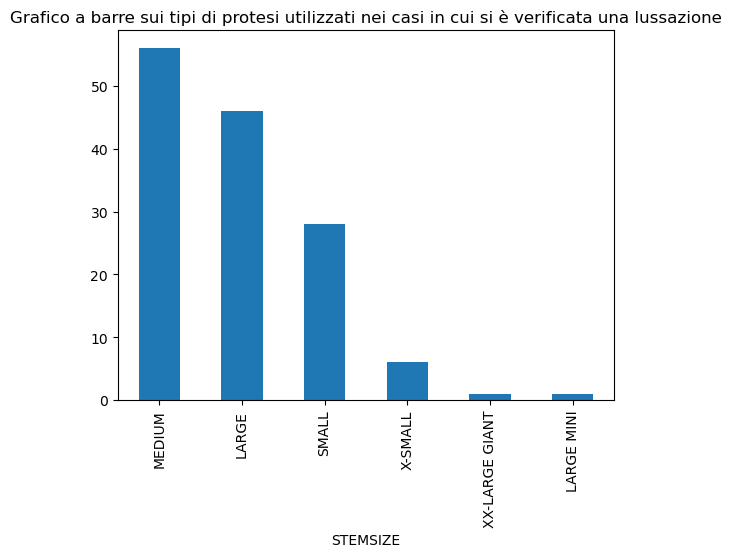

In [76]:
db.STEMSIZE.value_counts().plot.bar()
plt.title("Grafico a barre sui tipi di protesi utilizzati nei casi in cui si è verificata una lussazione")
plt.show()

Alcune tipi di protesi per i casi in cui la lussazione si è verificata non sono stati utilizzati:
+ TIGER
+ X-LARGE MINI
+ X-LARGE
+ X-LARGE GIANT
+ XX-LARGE



In [77]:
dbNan.STEMSIZE.value_counts()

STEMSIZE
MEDIUM            1330
LARGE              742
SMALL              700
X-SMALL            183
X-LARGE GIANT       34
X-LARGE             22
X-LARGE MINI        21
TIGER               14
XX-LARGE GIANT       4
LARGE MINI           4
XX-LARGE             2
Name: count, dtype: int64

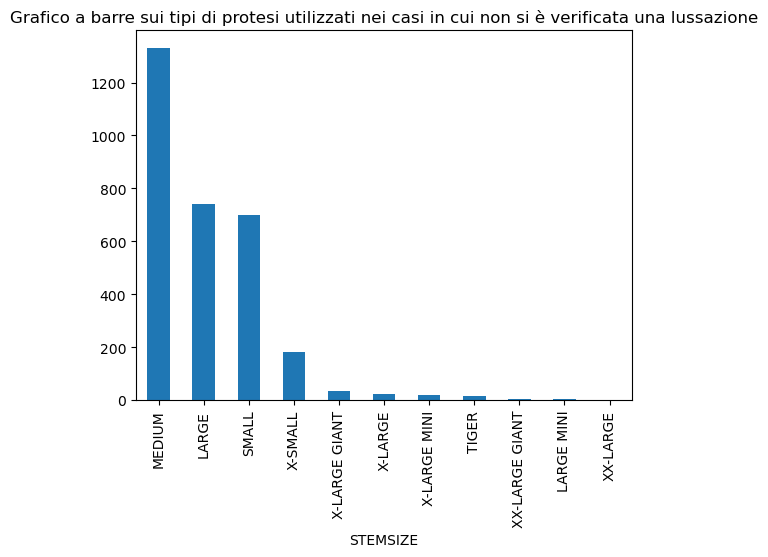

In [78]:
dbNan.STEMSIZE.value_counts().plot.bar()
plt.title("Grafico a barre sui tipi di protesi utilizzati nei casi in cui non si è verificata una lussazione")
plt.show()

In questo caso invece tutti i tipi di protesi sono stati utilizzati.

In [79]:
db.BODYWEIGHTKG.str.replace(',', '.').astype('float64').mean()

33.53478260869565

In [80]:
dbNan.BODYWEIGHTKG.str.replace(',', '.').astype('float64').mean()

32.231331806282725

Il peso medio tra quelli che hanno subito una lussazione e quelli che non hanno subito una lussazione è molto simile.

In [81]:
db.AGEATSURGERYmo.str.replace(',', '.').astype('float64').mean()

27.097971014492753

In [82]:
dbNan.AGEATSURGERYmo.str.replace(',', '.').astype('float64').mean()

39.37057155322862

L'età media tra quelli che hanno subito una lussazione e quelli che non hanno subito una lussazione è abbastanza diversa, infatti l'età media dei cani che hanno subito una lussazione dopo l'operazione è inferiore, un cane più giovane ha più probabilità a subire una lussazione.